In [71]:
from collections import Counter
import random
import logging

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
class Lineup:
    def __init__(self, sluggerpos):
        self.sluggerpos = list(sluggerpos)
    
    def __getitem__(self, key):
        if key in self.sluggerpos:
            return 'S'
        else:
            return 'C'

In [92]:
def play_n_innings(lineup, n=1):
    runs = 0
    i = 0
    for inning in range(n):
        logging.debug(f"Inning {inning}")
        outs = 0
        runners_on_base = 0
        while outs < 3:
            batter = lineup[i % 9]
            if batter == 'C':
                logging.debug(f"Contact hitter {i % 9} is up")
                if random.random() <= (1/3):
                    logging.debug("hit!")
                    if runners_on_base == 3:
                        logging.debug("bases loaded, run scores")
                        runs += 1
                    else:
                        runners_on_base += 1
                else:
                    logging.debug("out!")
                    outs += 1
            elif batter == 'S':
                logging.debug(f"Slugger {i % 9} is up")
                if random.random() <= 0.1:
                    logging.debug("home run!")
                    runs += (runners_on_base + 1)
                    runners_on_base = 0
                else:
                    logging.debug("out!")
                    outs += 1
            i += 1
    return runs

logging.getLogger().setLevel(logging.DEBUG)
play_n_innings(Lineup([3]), 9)

DEBUG:root:Inning 0
DEBUG:root:Contact hitter 0 is up
DEBUG:root:hit!
DEBUG:root:Contact hitter 1 is up
DEBUG:root:out!
DEBUG:root:Contact hitter 2 is up
DEBUG:root:hit!
DEBUG:root:Slugger 3 is up
DEBUG:root:home run!
DEBUG:root:Contact hitter 4 is up
DEBUG:root:out!
DEBUG:root:Contact hitter 5 is up
DEBUG:root:out!
DEBUG:root:Inning 1
DEBUG:root:Contact hitter 6 is up
DEBUG:root:out!
DEBUG:root:Contact hitter 7 is up
DEBUG:root:hit!
DEBUG:root:Contact hitter 8 is up
DEBUG:root:hit!
DEBUG:root:Contact hitter 0 is up
DEBUG:root:out!
DEBUG:root:Contact hitter 1 is up
DEBUG:root:out!
DEBUG:root:Inning 2
DEBUG:root:Contact hitter 2 is up
DEBUG:root:hit!
DEBUG:root:Slugger 3 is up
DEBUG:root:home run!
DEBUG:root:Contact hitter 4 is up
DEBUG:root:out!
DEBUG:root:Contact hitter 5 is up
DEBUG:root:hit!
DEBUG:root:Contact hitter 6 is up
DEBUG:root:out!
DEBUG:root:Contact hitter 7 is up
DEBUG:root:hit!
DEBUG:root:Contact hitter 8 is up
DEBUG:root:hit!
DEBUG:root:Contact hitter 0 is up
DEBUG:root

6

In [98]:
logging.getLogger().setLevel(logging.WARNING)

def play_n_innings_m_times(lineup, n=1, m=100000):
    counter = Counter()
    for _ in range(m):
        runs = play_n_innings(lineup, n)
        counter[runs] += 1
    return counter

out = play_n_innings_m_times(Lineup([3, 6]), 9)
out

Counter({0: 31625,
         1: 19868,
         5: 4967,
         3: 11906,
         4: 7737,
         7: 1708,
         10: 290,
         2: 16914,
         6: 3044,
         9: 594,
         8: 1033,
         12: 84,
         11: 142,
         14: 22,
         15: 10,
         13: 44,
         17: 1,
         18: 2,
         16: 8,
         21: 1})

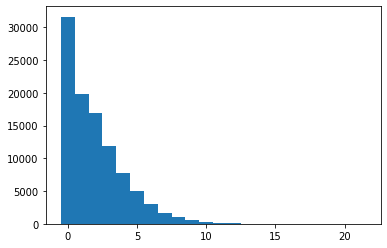

In [99]:
gety = np.vectorize(lambda x: out[x])

def plot_output(out):
    x = np.arange(max(out.keys())+1)
    y = gety(x)
    x, y
    width = 1
    plt.bar(x, y, width)
    plt.show()
    
plot_output(out)

In [76]:
def calc_mean(counter):
    total_runs = 0
    for k in counter.keys():
        total_runs += (k * counter[k])
    total_games = sum(counter.values())
    return total_runs / total_games

calc_mean(out)

0.23947

In [85]:
data={"sluggerpos": [], "mean_runs": []}
for pos in range(9):
    print(pos)
    mean_runs_counter = play_1_inning_n_times(Lineup([pos]), 500000)
    data["sluggerpos"].append(pos)
    data["mean_runs"].append(calc_mean(mean_runs_counter))
df = pd.DataFrame(data)

0
1
2
3
4
5
6
7
8


In [86]:
df

,sluggerpos,mean_runs
0,0,0.184254
1,1,0.211092
2,2,0.238334
3,3,0.239666
4,4,0.203098
5,5,0.155634
6,6,0.168878
7,7,0.175032
8,8,0.177680


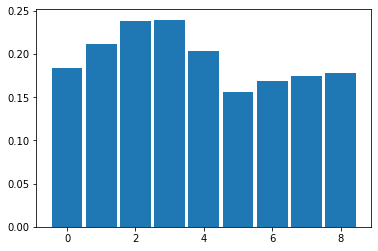

In [87]:
plt.bar(df.sluggerpos, df.mean_runs, 0.9)
plt.show()